<a href="https://colab.research.google.com/github/gobi2001-2006/computer-vision/blob/main/exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RGB TO CMYK

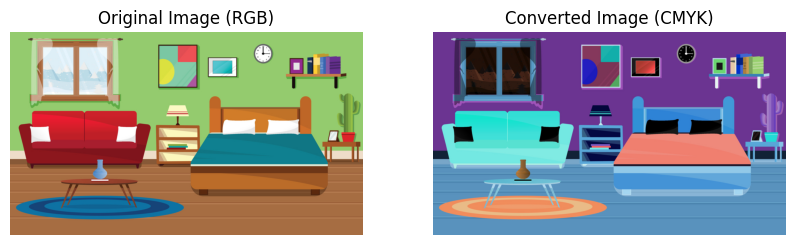

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("pic.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cmy_image = 255 - image_rgb

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image (RGB)')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(cmy_image)
plt.title('Converted Image (CMYK)')
plt.axis('off')

plt.show()



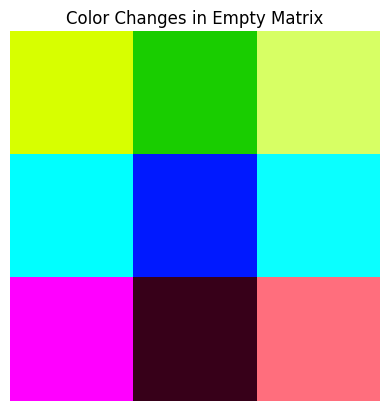

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
image=np.zeros((3,3,3),dtype=np.uint8)
image[0, 0] = [215, 255, 0]
image[0, 1] = [25, 205, 0]
image[0, 2] = [215, 255, 100]

image[1, 1] = [0, 25, 255]
image[1, 2] = [10, 255, 255]
image[1, 0] = [0, 255, 255]
image[2, 0] = [255, 0, 255]
image[2, 1] = [55, 0, 25]
image[2, 2] = [255,110, 125]
plt.imshow(image)
plt.title('Color Changes in Empty Matrix')
plt.axis('off')
plt.show()

RGB TO HSV

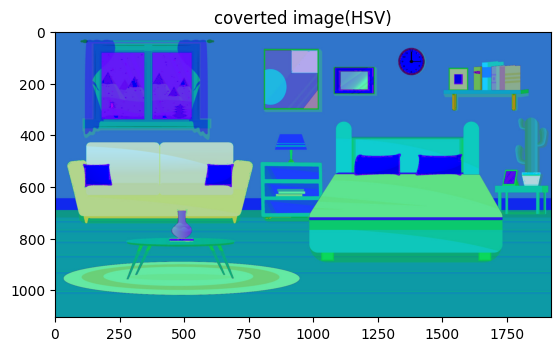

In [ ]:
import cv2
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
plt.imshow(image_hsv)
plt.title('coverted image(HSV)')
plt.show()

RGB TO HSV WITHOUT IN BUILT FUNCTION

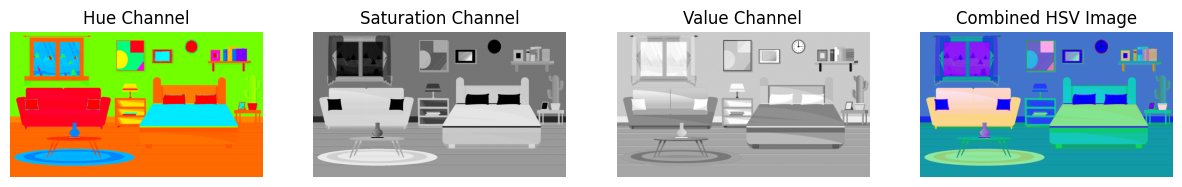

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("pic.jpg")

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Normalize RGB values to [0, 1]
image_rgb_normalized = image_rgb / 255.0

# Initialize HSV arrays
H = np.zeros_like(image_rgb[:, :, 0], dtype=float)
S = np.zeros_like(image_rgb[:, :, 0], dtype=float)
V = np.zeros_like(image_rgb[:, :, 0], dtype=float)

# Loop through each pixel and calculate HSV
for i in range(image_rgb.shape[0]):
    for j in range(image_rgb.shape[1]):
        R, G, B = image_rgb_normalized[i, j]

        # Calculate Cmax, Cmin, and delta
        Cmax = max(R, G, B)
        Cmin = min(R, G, B)
        Δ = Cmax - Cmin

        # Calculate Hue
        if Δ == 0:
            H[i, j] = 0
        elif Cmax == R:
            H[i, j] = (60 * ((G - B) / Δ) + 360) % 360
        elif Cmax == G:
            H[i, j] = (60 * ((B - R) / Δ) + 120) % 360
        elif Cmax == B:
            H[i, j] = (60 * ((R - G) / Δ) + 240) % 360

        # Calculate Saturation
        if Cmax == 0:
            S[i, j] = 0
        else:
            S[i, j] = Δ / Cmax

        # Calculate Value
        V[i, j] = Cmax

# Normalize H, S, and V for visualization
H_normalized = H / 360.0  # Hue normalized to [0, 1]
S_normalized = S  # Saturation is already in [0, 1]
V_normalized = V  # Value is already in [0, 1]

# Plot the separate channels
plt.figure(figsize=(15, 5))

# Hue channel
plt.subplot(1, 4, 1)
plt.imshow(H_normalized, cmap='hsv')
plt.title('Hue Channel')
plt.axis('off')

# Saturation channel
plt.subplot(1, 4, 2)
plt.imshow(S_normalized, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

# Value channel
plt.subplot(1, 4, 3)
plt.imshow(V_normalized, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

# Combine the channels and visualize
hsv_combined = np.stack([H_normalized, S_normalized, V_normalized], axis=-1)
plt.subplot(1, 4, 4)
plt.imshow(hsv_combined)
plt.title('Combined HSV Image')
plt.axis('off')

plt.show()


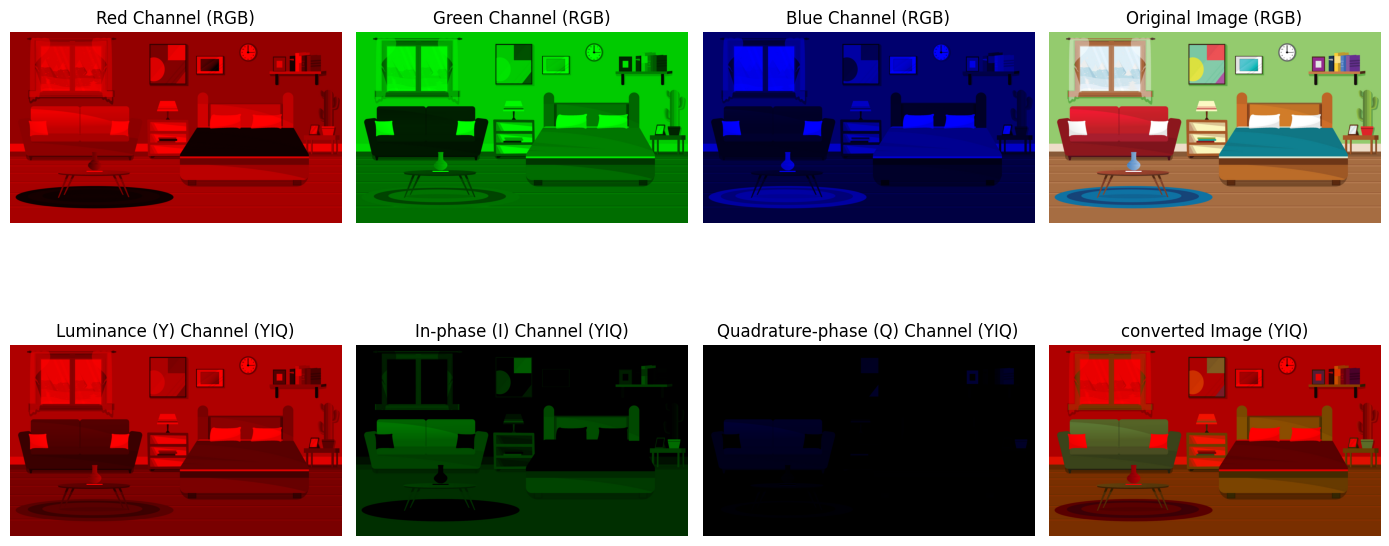

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("pic.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
R, G, B = cv2.split(image_rgb)
Y = 0.299 * R + 0.587 * G + 0.114 * B
I = 0.596 * R - 0.274 * G - 0.322 * B
Q = 0.211 * R - 0.523 * G + 0.312 * B
Y = np.clip(Y, 0, 255).astype(np.uint8)
I = np.clip(I, 0, 255).astype(np.uint8)
Q = np.clip(Q, 0, 255).astype(np.uint8)
yiq_image = cv2.merge([Y, I, Q])
plt.figure(figsize=(14, 10))


red_channel = cv2.merge([R, np.zeros_like(G), np.zeros_like(B)])
plt.subplot(3, 4, 1)
plt.imshow(red_channel)
plt.title("Red Channel (RGB)")
plt.axis('off')

green_channel = cv2.merge([np.zeros_like(R), G, np.zeros_like(B)])
plt.subplot(3, 4, 2)
plt.imshow(green_channel)
plt.title("Green Channel (RGB)")
plt.axis('off')

blue_channel = cv2.merge([np.zeros_like(R), np.zeros_like(G), B])
plt.subplot(3, 4, 3)
plt.imshow(blue_channel)
plt.title("Blue Channel (RGB)")
plt.axis('off')


plt.subplot(3, 4, 4)
plt.imshow(image_rgb)
plt.title("Original Image (RGB)")
plt.axis('off')

# Show the Luminance (Y) channel (YIQ) - Set I and Q channels to 0
luminance_channel = cv2.merge([Y, np.zeros_like(I), np.zeros_like(Q)])
plt.subplot(3, 4, 5)
plt.imshow(luminance_channel)
plt.title("Luminance (Y) Channel (YIQ)")
plt.axis('off')


in_phase_channel = cv2.merge([np.zeros_like(Y), I, np.zeros_like(Q)])
plt.subplot(3, 4, 6)
plt.imshow(in_phase_channel)
plt.title("In-phase (I) Channel (YIQ)")
plt.axis('off')


quadrature_phase_channel = cv2.merge([np.zeros_like(Y), np.zeros_like(I), Q])
plt.subplot(3, 4, 7)
plt.imshow(quadrature_phase_channel)
plt.title("Quadrature-phase (Q) Channel (YIQ)")
plt.axis('off')


plt.subplot(3, 4, 8)
plt.imshow(yiq_image)
plt.title("converted Image (YIQ)")
plt.axis('off')

plt.tight_layout()
plt.show()



Modify the image properties:


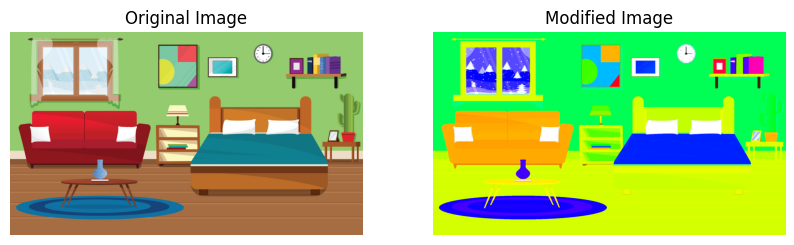

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("pic.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def modify_hsv(image_rgb, hue_shift, saturation_factor, value_factor):
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    H, S, V = cv2.split(image_hsv)
    H = (H + hue_shift) % 180
    S = np.clip(S * saturation_factor, 0, 255).astype(np.uint8)
    V = np.clip(V * value_factor, 0, 255).astype(np.uint8)

    image_hsv_modified = cv2.merge([H, S, V])
    return cv2.cvtColor(image_hsv_modified, cv2.COLOR_HSV2RGB)


def main(image_rgb):
    while True:
        print("\nModify the image properties:")
        hue_shift = int(input("Enter the Hue shift value (e.g., 30 or -30): "))
        saturation_factor = float(input("Enter the Saturation factor (e.g., 1.5 or 0.5): "))
        value_factor = float(input("Enter the Brightness factor (e.g., 1.5 or 0.5): "))


        modified_image = modify_hsv(image_rgb, hue_shift, saturation_factor, value_factor)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image_rgb)
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(modified_image)
        plt.title("Modified Image")
        plt.axis('off')
        plt.show()


        cont = input("Do you want to modify again? (yes/no): ").strip().lower()
        if cont != "yes":
            print("Exiting.")
            break
main(image_rgb)

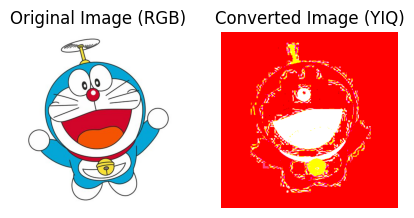

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("DORA.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
R, G, B = cv2.split(image_rgb)
Y = 0.299 * R + 0.587 * G + 0.114 * B
I = 0.596 * R - 0.274 * G - 0.322 * B
Q = 0.211 * R - 0.523 * G + 0.312 * B
yiq_image = np.stack((Y, I, Q), axis=-1)
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image (RGB)')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(yiq_image)
plt.title('Converted Image (YIQ)')
plt.axis('off')

plt.show()
